In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-152V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = residual_block_v2(x, filters=512, strides=2)
x = residual_block_v2(x, filters=512)
x = residual_block_v2(x, filters=512)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Training for potentially many epochs, but with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=20,  # Train potentially for many epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

# Evaluation
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Additional Evaluation (Accuracy)
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)



Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.



Epoch 1/20


375/375 [==============================] - 796s 2s/step - loss: 2.0240 - accuracy: 0.4482 - val_loss: 4.7172 - val_accuracy: 0.0957
Epoch 2/20
375/375 [==============================] - 632s 2s/step - loss: 0.5473 - accuracy: 0.8257 - val_loss: 0.7034 - val_accuracy: 0.7710
Epoch 3/20
375/375 [==============================] - 665s 2s/step - loss: 0.3285 - accuracy: 0.8956 - val_loss: 0.4564 - val_accuracy: 0.8590
Epoch 4/20
375/375 [==============================] - 669s 2s/step - loss: 0.2137 - accuracy: 0.9316 - val_loss: 0.3499 - val_accuracy: 0.8967
Epoch 5/20
375/375 [==============================] - 569s 2s/step - loss: 0.1839 - accuracy: 0.9417 - val_loss: 0.4395 - val_accuracy: 0.8670
Epoch 6/20
375/375 [==============================] - 485s 1s/step - loss: 0.1390 - accuracy: 0.9558 - val_loss: 0.2477 - val_accuracy: 0.9237
Epoch 7/20
375/375 [=============================

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.
Epoch 1/20
375/375 [==============================] - 188s 470ms/step - loss: 2.2675 - accuracy: 0.3798 - val_loss: 7.2073 - val_accuracy: 0.0530
Epoch 2/20
375/375 [==============================] - 172s 458ms/step - loss: 0.6147 - accuracy: 0.8048 - val_loss: 1.1902 - val_accuracy: 0.6793
Epoch 3/20
375/375 [==============================] - 169s 450ms/step - loss: 0.3440 - accuracy: 0.8930 - val_loss: 0.5524 - val_accuracy: 0.8427
Epoch 4/20
375/375 [==============================] - 169s 451ms/step - loss: 0.2475 - accuracy: 0.9228 - val_loss: 0.3286 - val_accuracy: 0.8967
Epoch 5/20
375/375 [==============================] - 171s 455ms/step - loss: 0.1785 - accuracy: 0.9437 - val_loss: 0.5501 - val_accuracy: 0.8547
Epoch 6/20
375/375 [==============================] - 171s 457ms/step - loss: 0.1549 - accuracy: 0.9498 - val_loss: 0.1824 - val_accuracy: 0.9420
Epoch 7/20
375/375 [=================

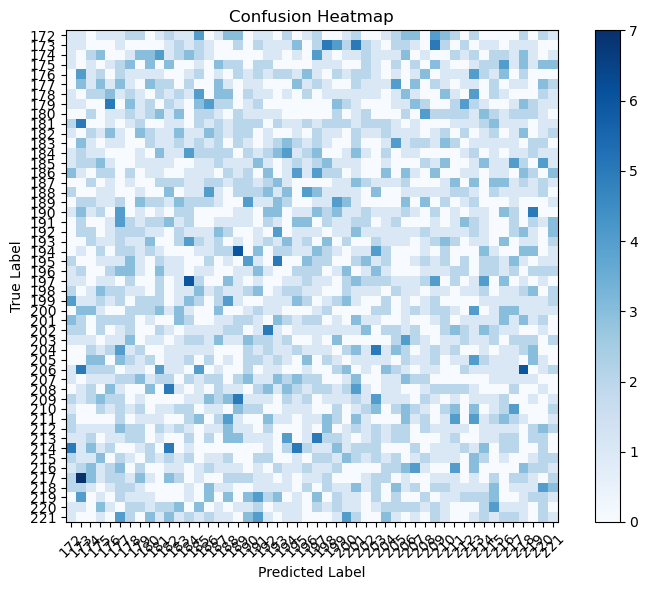

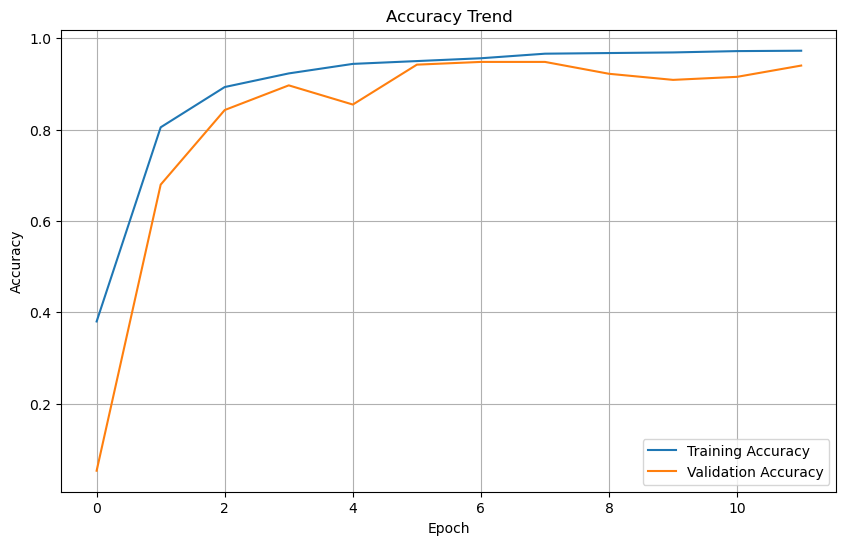

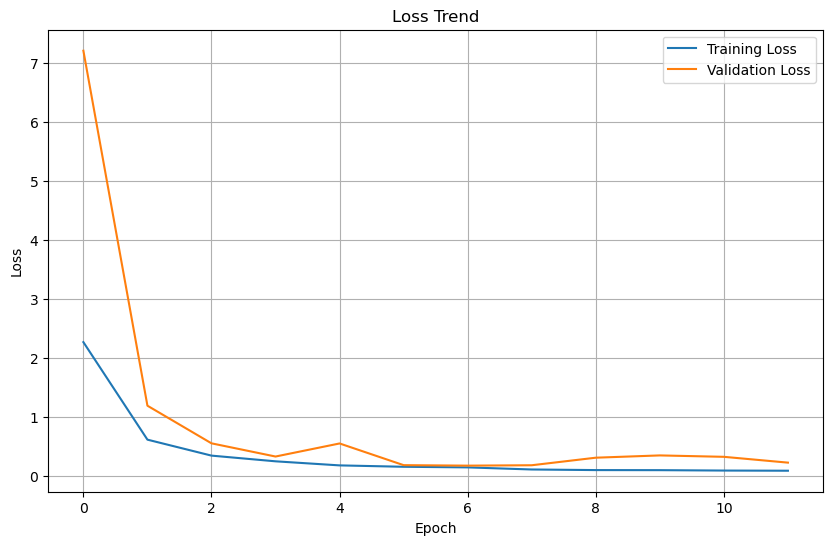

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-152V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = residual_block_v2(x, filters=512, strides=2)
x = residual_block_v2(x, filters=512)
x = residual_block_v2(x, filters=512)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Training for potentially many epochs, but with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=20,  # Train potentially for many epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

# Evaluation
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Additional Evaluation (Accuracy)
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Heatmap")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Trend')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Trend')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.



Epoch 1/35


375/375 [==============================] - 178s 443ms/step - loss: 2.6413 - accuracy: 0.2902 - val_loss: 5.3530 - val_accuracy: 0.1283
Epoch 2/35
375/375 [==============================] - 167s 444ms/step - loss: 0.7844 - accuracy: 0.7517 - val_loss: 0.5610 - val_accuracy: 0.8253
Epoch 3/35
375/375 [==============================] - 166s 442ms/step - loss: 0.3991 - accuracy: 0.8703 - val_loss: 0.5395 - val_accuracy: 0.8430
Epoch 4/35
375/375 [==============================] - 167s 445ms/step - loss: 0.2625 - accuracy: 0.9152 - val_loss: 0.4671 - val_accuracy: 0.8657
Epoch 5/35
375/375 [==============================] - 166s 442ms/step - loss: 0.1915 - accuracy: 0.9373 - val_loss: 0.3632 - val_accuracy: 0.8967
Epoch 6/35
375/375 [==============================] - 165s 441ms/step - loss: 0.1600 - accuracy: 0.9478 - val_loss: 0.4030 - val_accuracy: 0.8900
Epoch 7/35
375/375 [===========

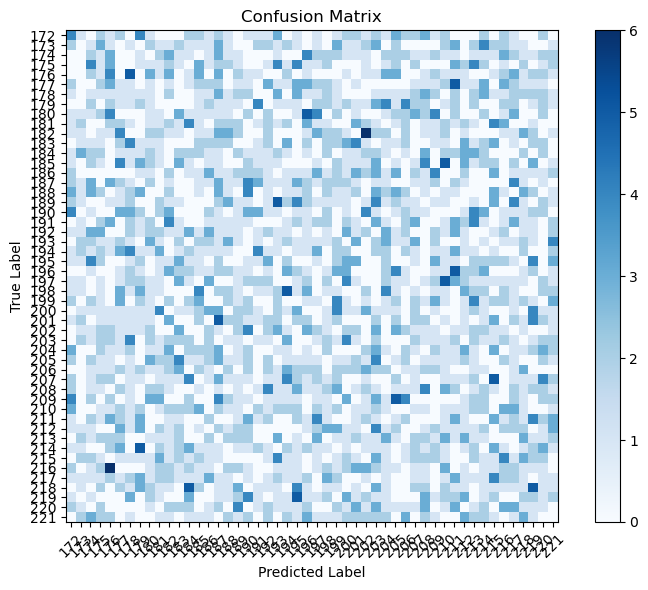

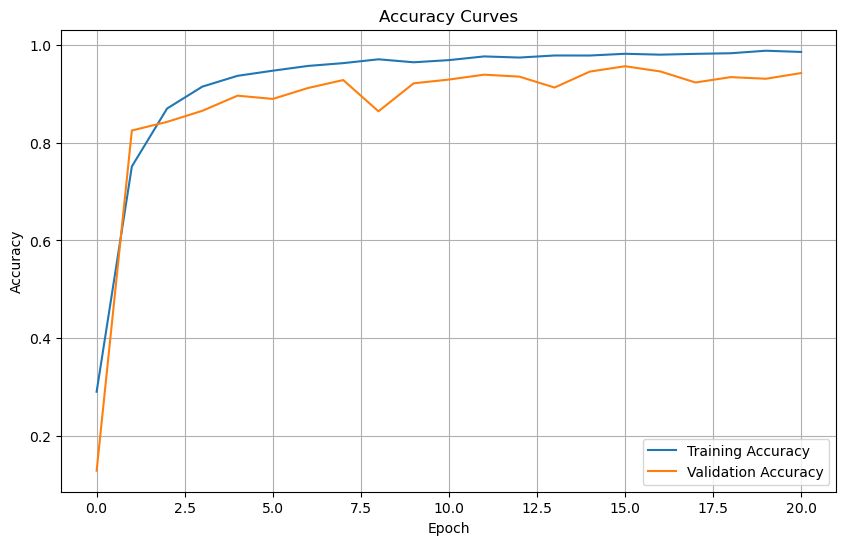

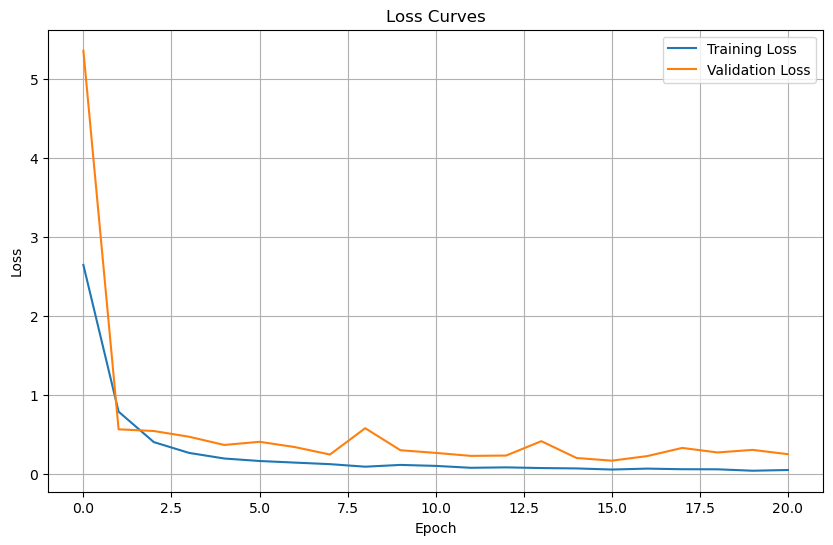

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-152V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = residual_block_v2(x, filters=512, strides=2)
x = residual_block_v2(x, filters=512)
x = residual_block_v2(x, filters=512)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

# Training with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=35,  # Train potentially for many epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

# Evaluation
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.



Epoch 1/34


375/375 [==============================] - 197s 495ms/step - loss: 1.9974 - accuracy: 0.4346 - val_loss: 6.3005 - val_accuracy: 0.0617
Epoch 2/34
375/375 [==============================] - 169s 450ms/step - loss: 0.5364 - accuracy: 0.8318 - val_loss: 0.8356 - val_accuracy: 0.7627
Epoch 3/34
375/375 [==============================] - 169s 449ms/step - loss: 0.3002 - accuracy: 0.9103 - val_loss: 0.3924 - val_accuracy: 0.8840
Epoch 4/34
375/375 [==============================] - 169s 451ms/step - loss: 0.2167 - accuracy: 0.9305 - val_loss: 0.5064 - val_accuracy: 0.8560
Epoch 5/34
375/375 [==============================] - 169s 450ms/step - loss: 0.1664 - accuracy: 0.9477 - val_loss: 0.2610 - val_accuracy: 0.9220
Epoch 6/34
375/375 [==============================] - 169s 450ms/step - loss: 0.1431 - accuracy: 0.9544 - val_loss: 0.4128 - val_accuracy: 0.8847
Epoch 7/34
375/375 [===========

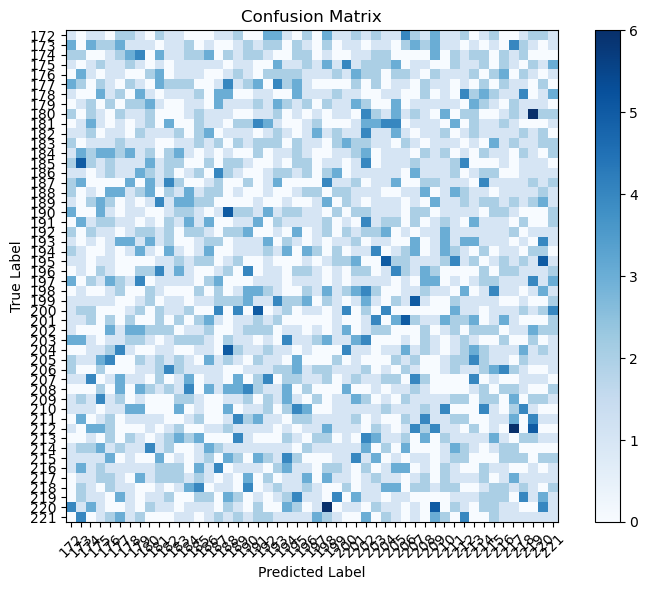

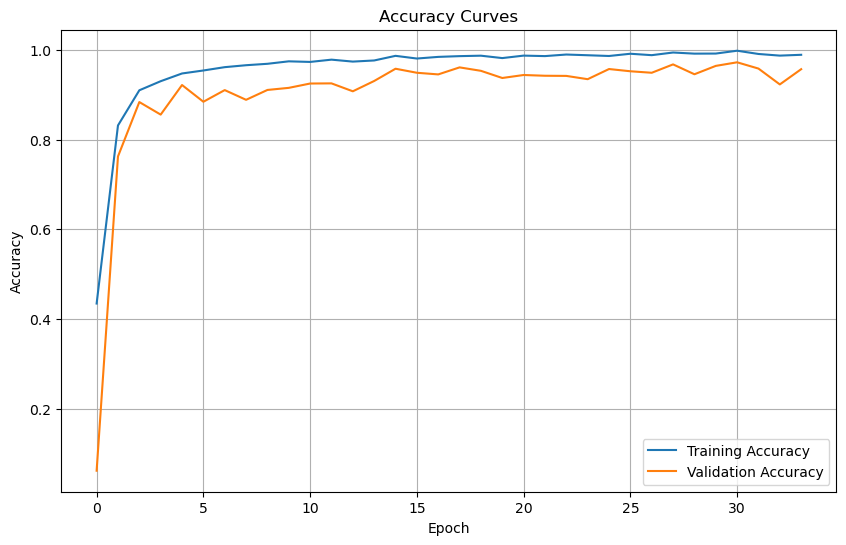

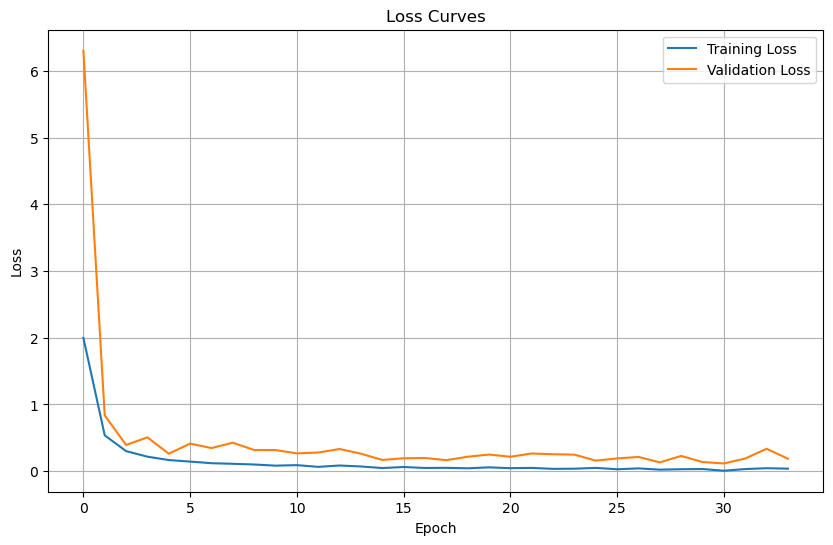

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-152V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = residual_block_v2(x, filters=512, strides=2)
x = residual_block_v2(x, filters=512)
x = residual_block_v2(x, filters=512)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training without early stopping for 34 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=34,  # Train for 34 epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size
)

# Evaluation
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.
Epoch 1/34
375/375 [==============================] - 178s 443ms/step - loss: 2.0808 - accuracy: 0.4213 - val_loss: 5.7224 - val_accuracy: 0.1097
Epoch 2/34
375/375 [==============================] - 165s 441ms/step - loss: 0.5700 - accuracy: 0.8213 - val_loss: 0.4922 - val_accuracy: 0.8467
Epoch 3/34
375/375 [==============================] - 166s 442ms/step - loss: 0.3243 - accuracy: 0.8991 - val_loss: 1.1716 - val_accuracy: 0.7253
Epoch 4/34
375/375 [==============================] - 164s 436ms/step - loss: 0.2174 - accuracy: 0.9325 - val_loss: 0.3840 - val_accuracy: 0.8863
Epoch 5/34
375/375 [==============================] - 167s 445ms/step - loss: 0.1716 - accuracy: 0.9451 - val_loss: 0.4909 - val_accuracy: 0.8733
Epoch 6/34
375/375 [==============================] - 166s 444ms/step - loss: 0.1530 - accuracy: 0.9530 - val_loss: 0.3719 - val_accuracy: 0.8920
Epoch 7/34
375/375 [=================

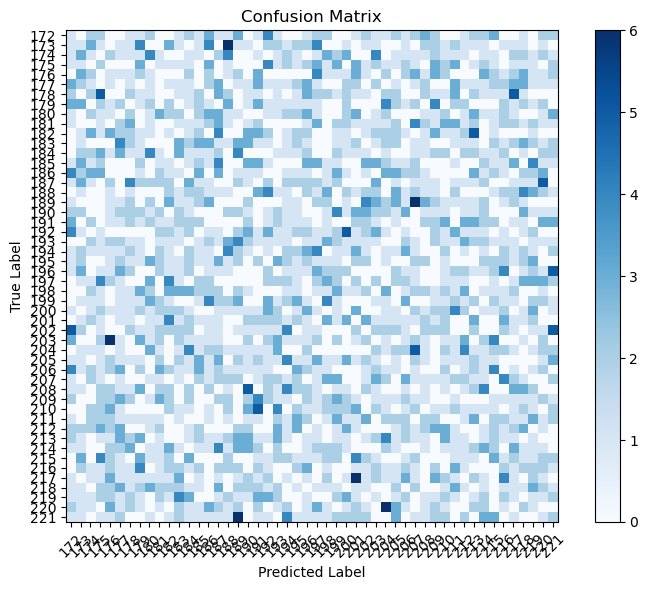

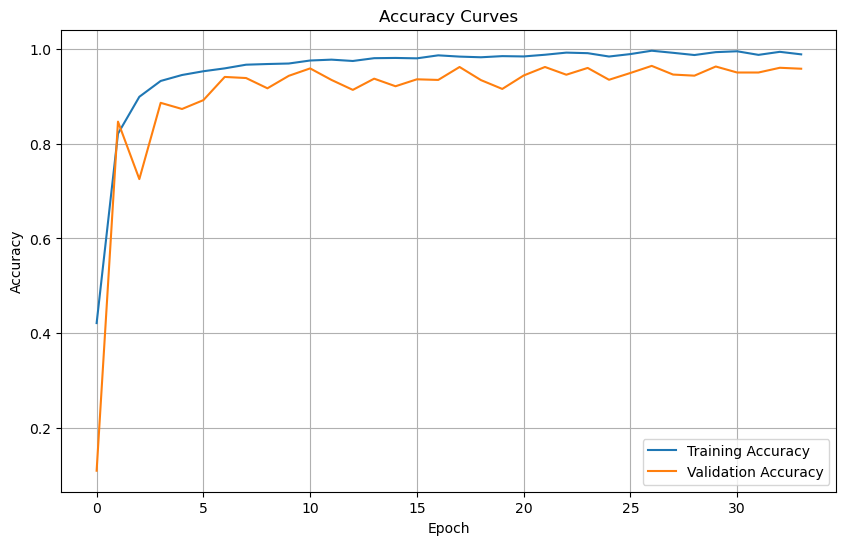

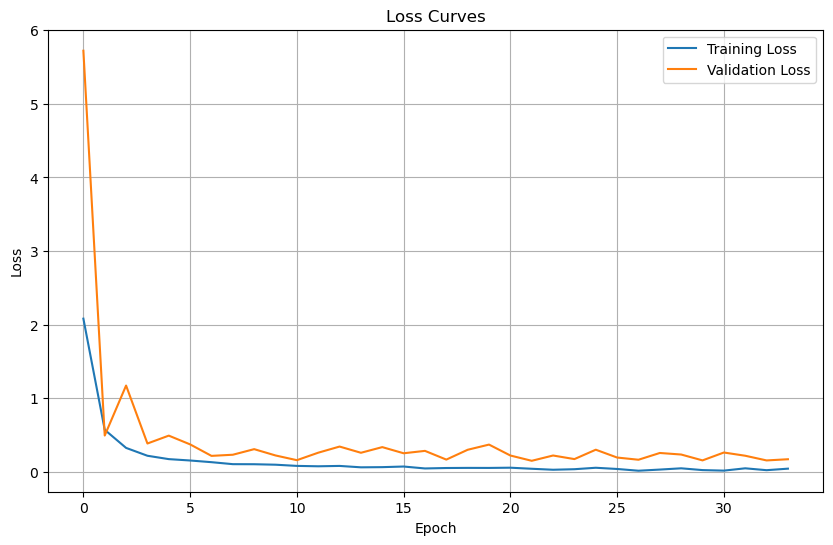

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-152V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = residual_block_v2(x, filters=512, strides=2)
x = residual_block_v2(x, filters=512)
x = residual_block_v2(x, filters=512)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training without early stopping for 34 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=34,  # Train for 34 epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size
)

# Evaluation
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.



Epoch 1/30


375/375 [==============================] - 183s 456ms/step - loss: 2.0777 - accuracy: 0.4146 - val_loss: 7.0789 - val_accuracy: 0.0623
Epoch 2/30
375/375 [==============================] - 170s 454ms/step - loss: 0.6124 - accuracy: 0.8072 - val_loss: 1.1148 - val_accuracy: 0.6863
Epoch 3/30
375/375 [==============================] - 175s 468ms/step - loss: 0.3324 - accuracy: 0.8981 - val_loss: 0.6397 - val_accuracy: 0.8100
Epoch 4/30
375/375 [==============================] - 170s 452ms/step - loss: 0.2282 - accuracy: 0.9269 - val_loss: 0.4374 - val_accuracy: 0.8713
Epoch 5/30
375/375 [==============================] - 171s 456ms/step - loss: 0.1880 - accuracy: 0.9411 - val_loss: 0.8193 - val_accuracy: 0.7820
Epoch 6/30
375/375 [==============================] - 173s 460ms/step - loss: 0.1566 - accuracy: 0.9493 - val_loss: 0.2893 - val_accuracy: 0.9153
Epoch 7/30
375/375 [===========

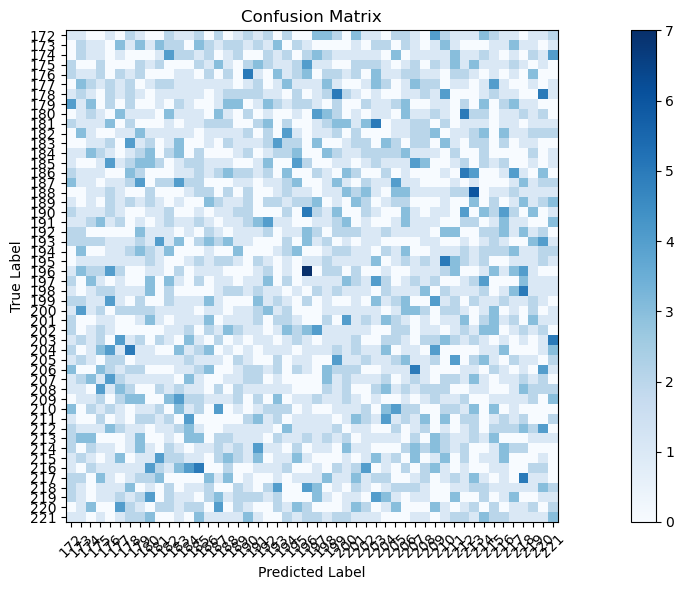

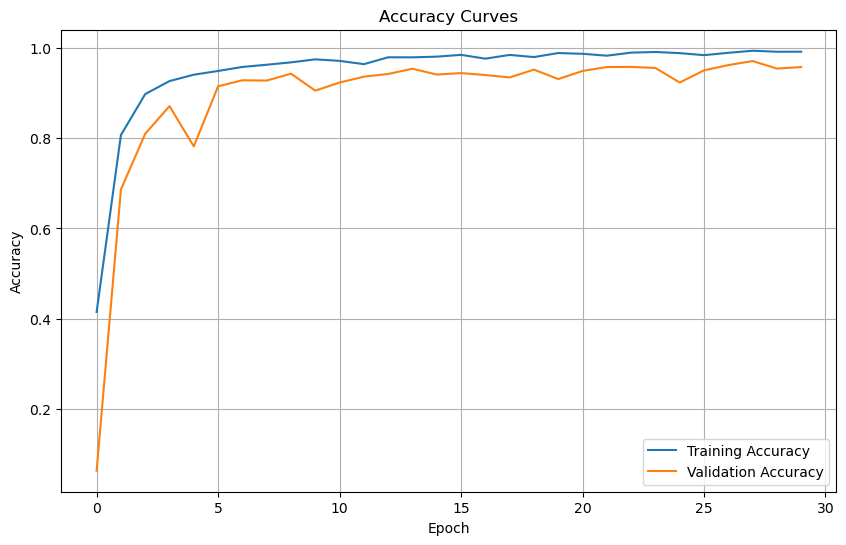

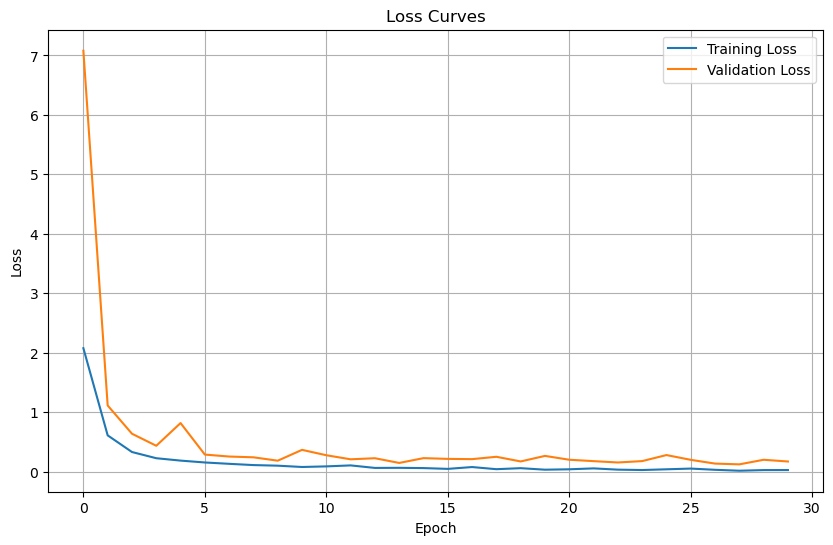

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-152V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = residual_block_v2(x, filters=512, strides=2)
x = residual_block_v2(x, filters=512)
x = residual_block_v2(x, filters=512)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training without early stopping for 34 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=30,  # Train for 34 epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size
)

# Evaluation
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(15, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
pip install shap

   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   -- ------------------------------------- 30.7/453.1 kB 1.3 MB/s eta 0:00:01
   -------- ------------------------------- 92.2/453.1 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 174.1/453.1 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 276.5/453.1 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.



Epoch 1/30


375/375 [==============================] - 202s 508ms/step - loss: 1.9083 - accuracy: 0.4631 - val_loss: 4.8030 - val_accuracy: 0.1280
Epoch 2/30
375/375 [==============================] - 163s 433ms/step - loss: 0.5580 - accuracy: 0.8295 - val_loss: 0.7858 - val_accuracy: 0.7637
Epoch 3/30
375/375 [==============================] - 162s 431ms/step - loss: 0.3315 - accuracy: 0.8960 - val_loss: 0.5809 - val_accuracy: 0.8437
Epoch 4/30
375/375 [==============================] - 164s 437ms/step - loss: 0.2162 - accuracy: 0.9327 - val_loss: 0.5316 - val_accuracy: 0.8473
Epoch 5/30
375/375 [==============================] - 162s 432ms/step - loss: 0.1947 - accuracy: 0.9389 - val_loss: 0.9046 - val_accuracy: 0.7723
Epoch 6/30
375/375 [==============================] - 161s 430ms/step - loss: 0.1337 - accuracy: 0.9573 - val_loss: 0.3362 - val_accuracy: 0.9047
Epoch 7/30
375/375 [===========

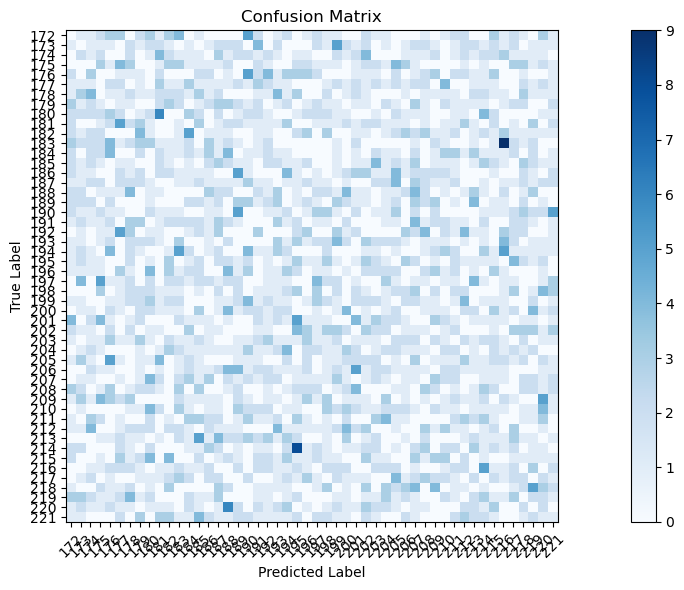

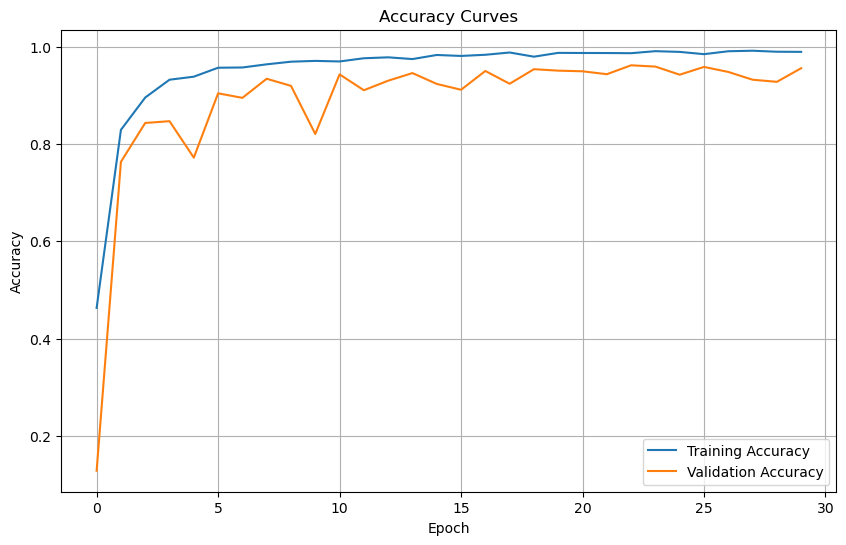

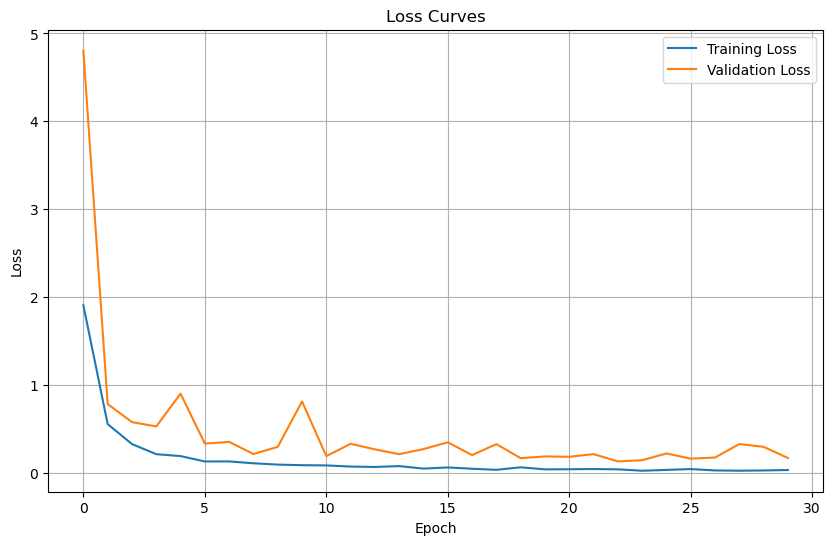

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from lime import lime_image
from PIL import Image

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-152V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = residual_block_v2(x, filters=512, strides=2)
x = residual_block_v2(x, filters=512)
x = residual_block_v2(x, filters=512)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training without early stopping for 34 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=30,  # Train for 34 epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size
)

# Evaluation
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(15, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from lime import lime_image
from PIL import Image

# Path to the training and testing directories
train_dir = r'D:\thesis\code\bangla_Handwritten_data\Train'
test_dir = r'D:\thesis\code\bangla_Handwritten_data\Test'

# Count the number of classes based on the number of subfolders in the training directory
num_classes = len(os.listdir(train_dir))

# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Other preprocessing techniques like rotation, zoom, etc. can be added here
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(50, 50),  # Resizing to 50x50 dimensions
    color_mode='grayscale',  # Convert images to grayscale
    batch_size=32,
    class_mode='categorical')

# Model Architecture (ResNet-152V2)
inputs = layers.Input(shape=(50, 50, 1))
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

# Residual Blocks
def residual_block_v2(x, filters, strides=1):
    shortcut = x
    if strides != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, 1, strides=strides, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

# Stack of residual blocks
x = residual_block_v2(x, filters=64, strides=1)
x = residual_block_v2(x, filters=64)
x = residual_block_v2(x, filters=64)

x = residual_block_v2(x, filters=128, strides=2)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)
x = residual_block_v2(x, filters=128)

x = residual_block_v2(x, filters=256, strides=2)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)
x = residual_block_v2(x, filters=256)

x = residual_block_v2(x, filters=512, strides=2)
x = residual_block_v2(x, filters=512)
x = residual_block_v2(x, filters=512)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create Model
model = models.Model(inputs, outputs)

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training without early stopping for 34 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=30,  # Train for 34 epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples/test_generator.batch_size
)

# Evaluation
y_pred = model.predict(test_generator)
y_true = test_generator.classes

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compute precision, recall, and F1-score
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_labels, target_names=class_labels)
print(report)

# Calculate test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.
Epoch 1/30
375/375 [==============================] - 174s 431ms/step - loss: 2.0500 - accuracy: 0.4349 - val_loss: 3.0432 - val_accuracy: 0.2647
Epoch 2/30
375/375 [==============================] - 160s 427ms/step - loss: 0.6120 - accuracy: 0.8028 - val_loss: 0.7655 - val_accuracy: 0.7847
Epoch 3/30
375/375 [==============================] - 159s 424ms/step - loss: 0.3619 - accuracy: 0.8878 - val_loss: 0.5464 - val_accuracy: 0.8410
Epoch 4/30
375/375 [==============================] - 159s 425ms/step - loss: 0.2354 - accuracy: 0.9272 - val_loss: 1.0966 - val_accuracy: 0.7317
Epoch 5/30
375/375 [==============================] - 159s 425ms/step - loss: 0.1860 - accuracy: 0.9423 - val_loss: 0.4522 - val_accuracy: 0.8713
Epoch 6/30
375/375 [==============================] - 160s 426ms/step - loss: 0.1468 - accuracy: 0.9532 - val_loss: 0.2893 - val_accuracy: 0.9160
Epoch 7/30
375/375 [=================

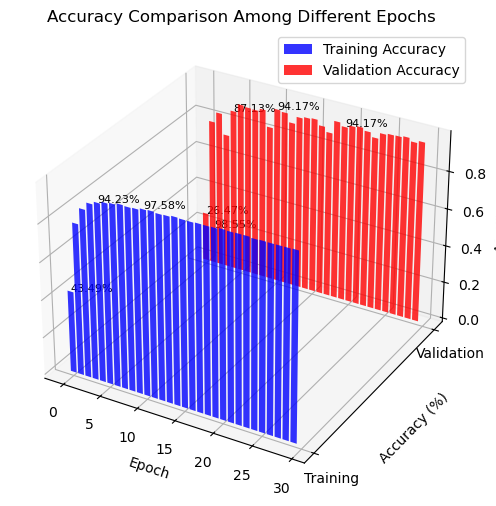

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Accuracy Curves
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting Training Accuracy
ax.bar(np.arange(len(history.history['accuracy'])), history.history['accuracy'], zs=0, zdir='y', label='Training Accuracy', color='b', alpha=0.8)

# Plotting Validation Accuracy
ax.bar(np.arange(len(history.history['val_accuracy'])), history.history['val_accuracy'], zs=1, zdir='y', label='Validation Accuracy', color='r', alpha=0.8)

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)')
ax.set_zlabel('Accuracy')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Training', 'Validation'])

# Annotating the accuracy at specific epochs
epochs_to_annotate = [1, 5, 11, 20]
for epoch in epochs_to_annotate:
    ax.text(epoch-1, 0, history.history['accuracy'][epoch-1], f'{history.history["accuracy"][epoch-1]*100:.2f}%', color='black', fontsize=8)
    ax.text(epoch-1, 1, history.history['val_accuracy'][epoch-1], f'{history.history["val_accuracy"][epoch-1]*100:.2f}%', color='black', fontsize=8)

plt.title('Accuracy Comparison Among Different Epochs')
plt.legend()
plt.show()



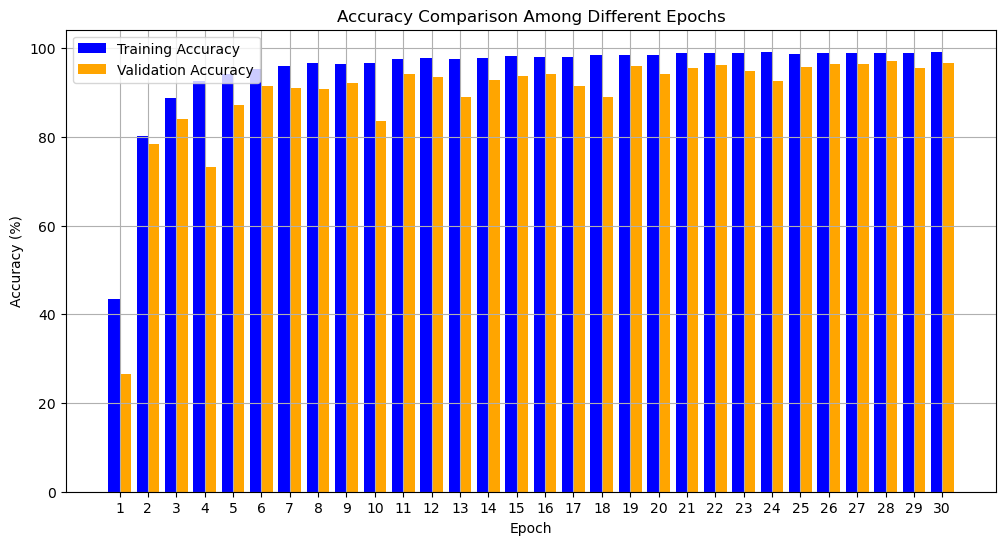

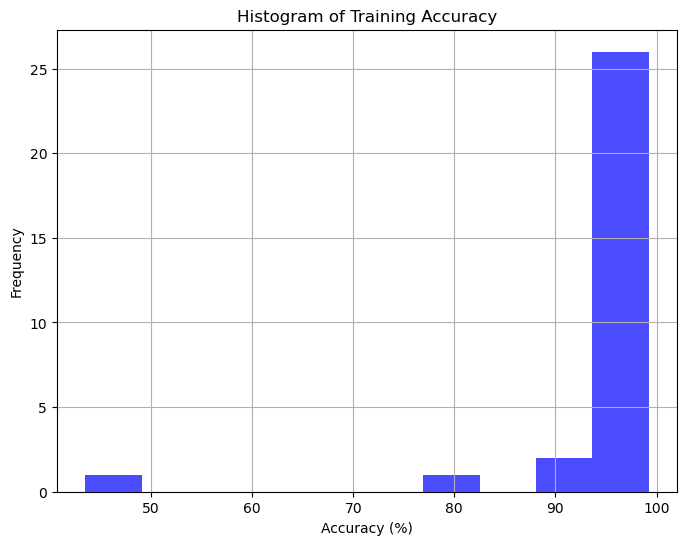

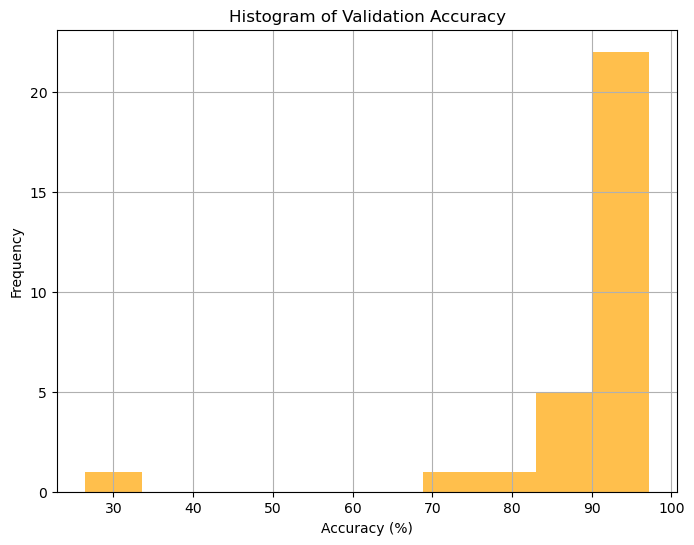

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Data
epochs = np.arange(1, 31)  # Assuming 30 epochs
training_accuracy = np.array(history.history['accuracy']) * 100
validation_accuracy = np.array(history.history['val_accuracy']) * 100

# Clustered Column Chart
plt.figure(figsize=(12, 6))
plt.bar(epochs - 0.2, training_accuracy, width=0.4, label='Training Accuracy', color='blue')
plt.bar(epochs + 0.2, validation_accuracy, width=0.4, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Among Different Epochs')
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

# Histogram for Training Accuracy
plt.figure(figsize=(8, 6))
plt.hist(training_accuracy, bins=10, color='blue', alpha=0.7)
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Training Accuracy')
plt.grid(True)
plt.show()

# Histogram for Validation Accuracy
plt.figure(figsize=(8, 6))
plt.hist(validation_accuracy, bins=10, color='orange', alpha=0.7)
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Validation Accuracy')
plt.grid(True)
plt.show()


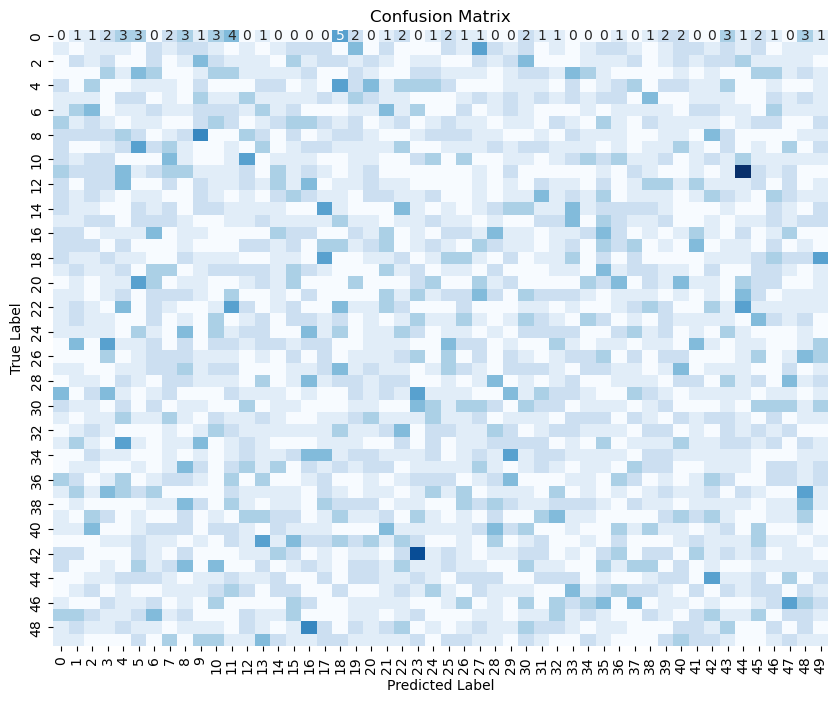

In [11]:
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


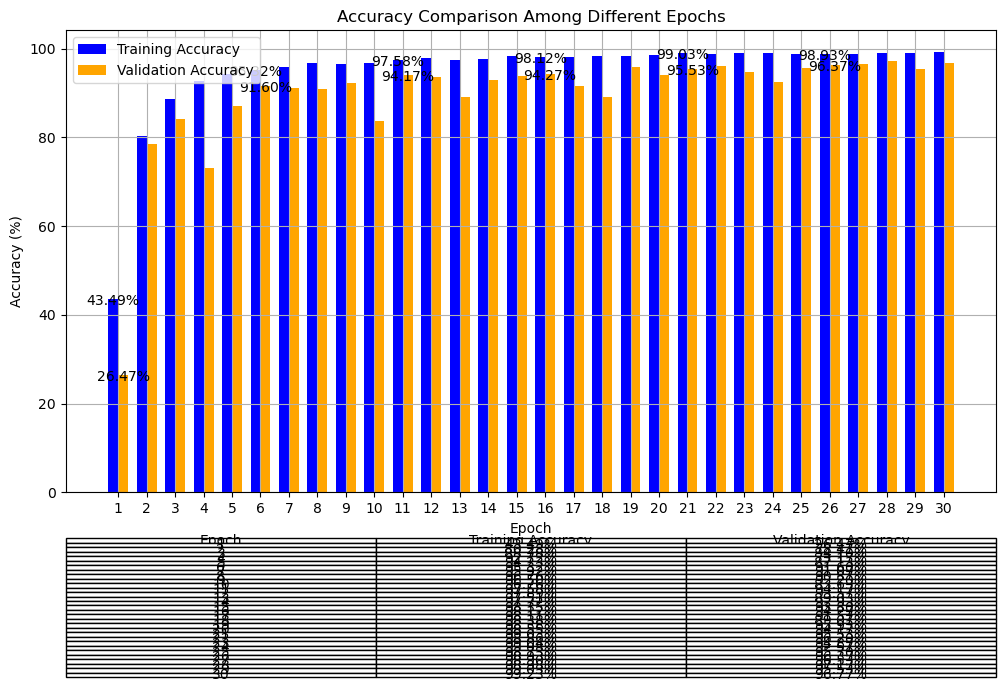

In [21]:
# Clustered Column Chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
plt.bar(epochs - bar_width/2, training_accuracy, width=bar_width, label='Training Accuracy', color='blue')
plt.bar(epochs + bar_width/2, validation_accuracy, width=bar_width, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Among Different Epochs')
plt.xticks(epochs)
plt.legend()

# Annotating values for every 5th epoch
annotation_epochs = epochs[::5]
for epoch, train_acc, val_acc in zip(epochs, training_accuracy, validation_accuracy):
    if epoch in annotation_epochs:
        plt.text(epoch - bar_width/2, train_acc - 2, f'{train_acc:.2f}%', ha='center', va='bottom', color='black')
        plt.text(epoch + bar_width/2, val_acc - 2, f'{val_acc:.2f}%', ha='center', va='bottom', color='black')

plt.grid(True)

# Adding a table
cell_text = []
for epoch, train_acc, val_acc in zip(epochs, training_accuracy, validation_accuracy):
    cell_text.append([f'{epoch}', f'{train_acc:.2f}%', f'{val_acc:.2f}%'])

plt.table(cellText=cell_text, colLabels=['Epoch', 'Training Accuracy', 'Validation Accuracy'],
          loc='bottom', cellLoc='center', bbox=[0, -0.4, 1, 0.3])

plt.show()


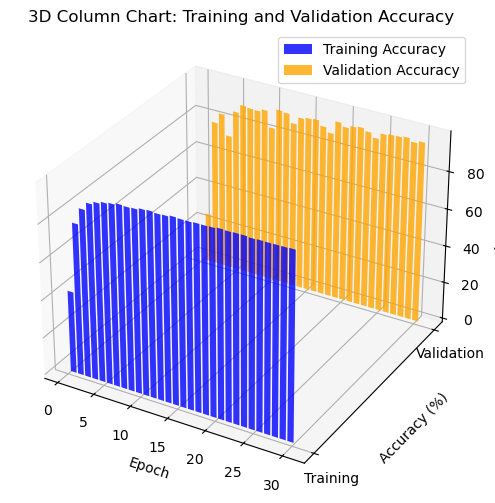

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
epochs = np.arange(1, 31)  # Assuming 30 epochs
training_accuracy = np.array(history.history['accuracy']) * 100
validation_accuracy = np.array(history.history['val_accuracy']) * 100

# Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.bar(epochs - 0.2, training_accuracy, zs=0, zdir='y', label='Training Accuracy', color='blue', alpha=0.8)
ax.bar(epochs + 0.2, validation_accuracy, zs=1, zdir='y', label='Validation Accuracy', color='orange', alpha=0.8)

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)')
ax.set_zlabel('Accuracy')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Training', 'Validation'])

plt.title('3D Column Chart: Training and Validation Accuracy')
plt.legend()
plt.show()


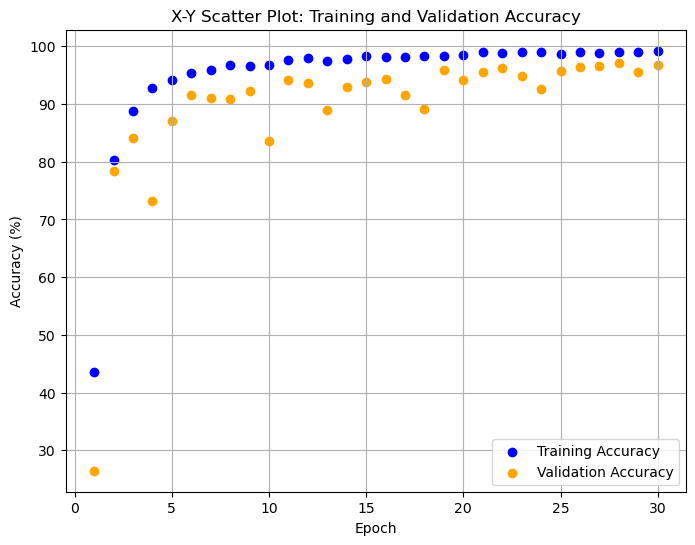

In [23]:
# X-Y Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(epochs, training_accuracy, label='Training Accuracy', color='blue')
plt.scatter(epochs, validation_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('X-Y Scatter Plot: Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


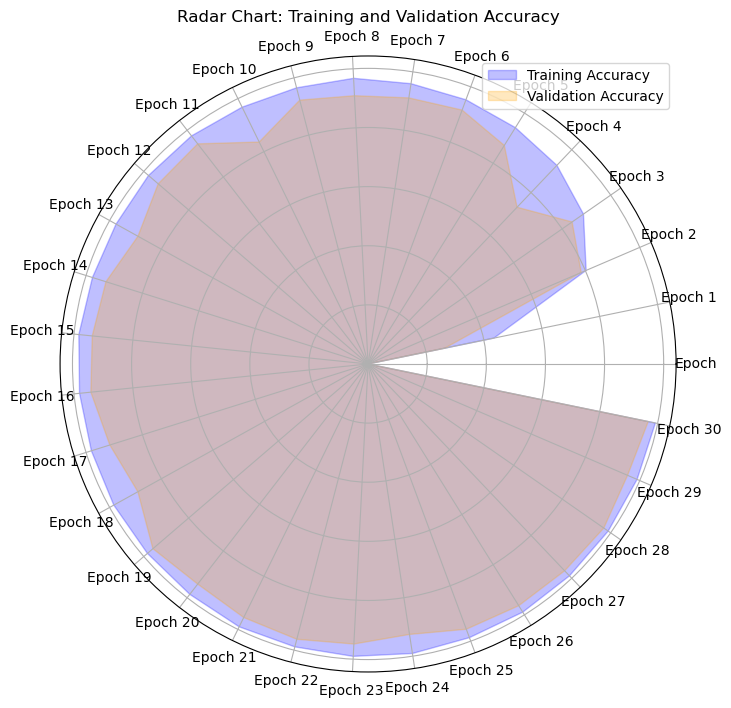

In [24]:
# Radar Chart
labels = ['Epoch'] + [f'Epoch {epoch}' for epoch in epochs]
stats = {'Training Accuracy': np.concatenate(([0], training_accuracy)),
         'Validation Accuracy': np.concatenate(([0], validation_accuracy))}

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats['Training Accuracy'], color='blue', alpha=0.25)
ax.fill(angles, stats['Validation Accuracy'], color='orange', alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(labels)

plt.title('Radar Chart: Training and Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


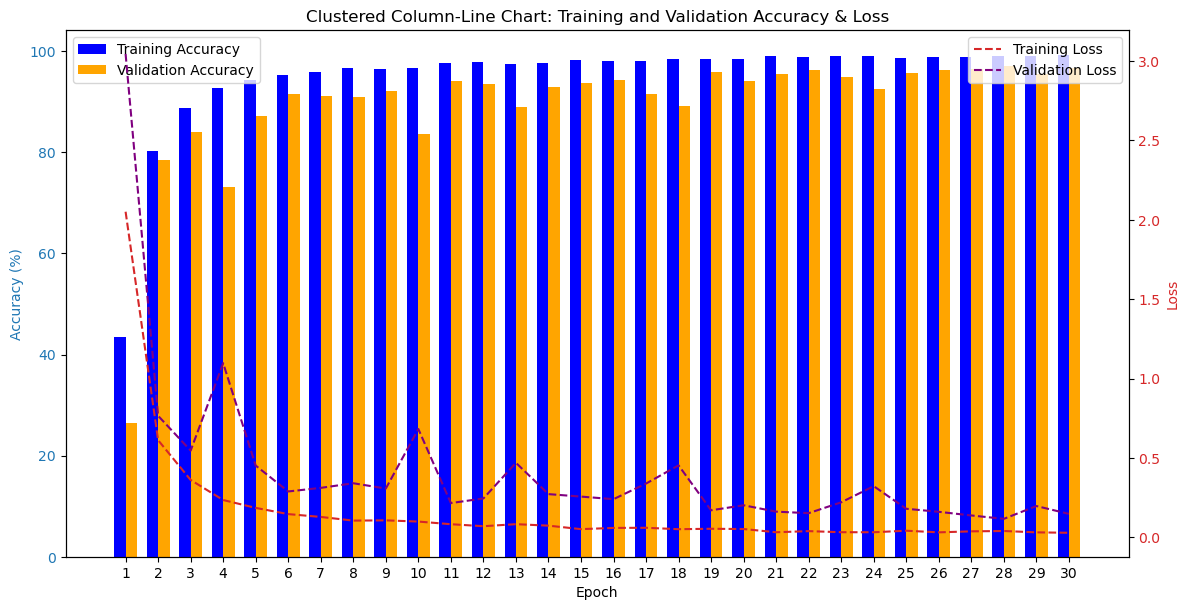

In [26]:
# Clustered Column-Line Chart
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.bar(epochs - bar_width/2, training_accuracy, width=bar_width, label='Training Accuracy', color='blue')
ax1.bar(epochs + bar_width/2, validation_accuracy, width=bar_width, label='Validation Accuracy', color='orange')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(epochs)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)  
ax2.plot(epochs, history.history['loss'], color=color, linestyle='--', label='Training Loss')
ax2.plot(epochs, history.history['val_loss'], color='purple', linestyle='--', label='Validation Loss')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  
plt.title('Clustered Column-Line Chart: Training and Validation Accuracy & Loss')
plt.show()


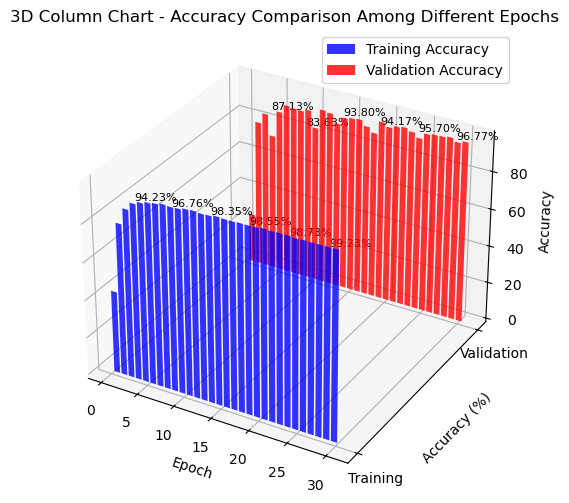

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting Training Accuracy
ax.bar(epochs - 0.2, training_accuracy, zs=0, zdir='y', label='Training Accuracy', color='b', alpha=0.8)

# Plotting Validation Accuracy
ax.bar(epochs + 0.2, validation_accuracy, zs=1, zdir='y', label='Validation Accuracy', color='r', alpha=0.8)

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)')
ax.set_zlabel('Accuracy')
ax.set_yticks([0, 1])
ax.set_yticklabels(['Training', 'Validation'])

# Annotating epoch values
epochs_to_annotate = [5, 10, 15, 20, 25, 30]
for epoch in epochs_to_annotate:
    ax.text(epoch-1, 0, training_accuracy[epoch-1], f'{training_accuracy[epoch-1]:.2f}%', color='black', fontsize=8)
    ax.text(epoch-1, 1, validation_accuracy[epoch-1], f'{validation_accuracy[epoch-1]:.2f}%', color='black', fontsize=8)

plt.title('3D Column Chart - Accuracy Comparison Among Different Epochs')
plt.legend()
plt.show()


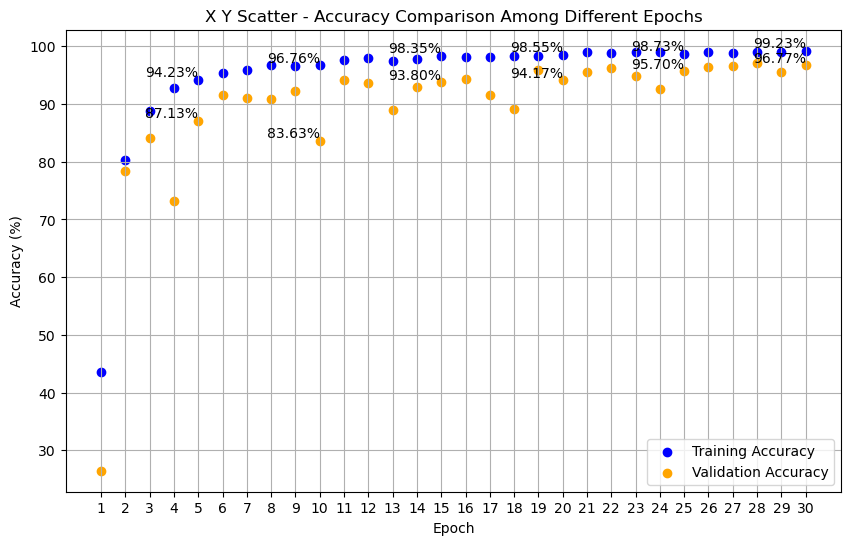

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(epochs, training_accuracy, label='Training Accuracy', color='blue')
plt.scatter(epochs, validation_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('X Y Scatter - Accuracy Comparison Among Different Epochs')
plt.xticks(epochs)
plt.legend()

# Annotating epoch values
epochs_to_annotate = [5, 10, 15, 20, 25, 30]
for epoch in epochs_to_annotate:
    plt.text(epoch, training_accuracy[epoch-1], f'{training_accuracy[epoch-1]:.2f}%', ha='right', va='bottom', color='black')
    plt.text(epoch, validation_accuracy[epoch-1], f'{validation_accuracy[epoch-1]:.2f}%', ha='right', va='bottom', color='black')

plt.grid(True)
plt.show()


In [30]:
from skimage import io, transform, segmentation, color
import matplotlib.pyplot as plt
import numpy as np
import lime
from lime import lime_image

# Load the sample image
sample_image_path = r'D:\\thesis\\code\\bangla_Handwritten_data\\Test\\172'
sample_image = io.imread(sample_image_path)

# Convert the input image to grayscale
sample_image_gray = color.rgb2gray(sample_image)

# Resize the input image to (50, 50)
sample_image_resized = transform.resize(sample_image_gray, (50, 50))

# Expand dimensions to make it compatible with model input
sample_image_resized = np.expand_dims(sample_image_resized, axis=-1)

# Define the segmentation function using the SLIC algorithm
def slic_segmentation(image):
    return segmentation.slic(image, n_segments=100, compactness=1, sigma=1)

# Initialize the LIME explainer with the SLIC segmentation function
explainer = lime_image.LimeImageExplainer()

# Explain the prediction for the sample image
explanation = explainer.explain_instance(sample_image_resized, model.predict, top_labels=5, hide_color=0, num_samples=1000, segmentation_fn=slic_segmentation)

# Display the original image
plt.imshow(sample_image_resized.squeeze(), cmap='gray')
plt.title('Original Grayscale Image (Resized)')
plt.axis('off')
plt.show()

# Display the LIME explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(temp)
plt.title('LIME Explanation')
plt.axis('off')
plt.show()


OSError: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`